# Proyek Predictive Analysis
- **Nama:** Bagus Satrio Wicaksono
- **Email:** bsatrio121@gmail.com
- **ID Dicoding:** satss121

# Domain Proyek
Data yang akan kita tangani kali ini adalah **Medical Cost Personal Dataset**, yang dipengaruhi oleh beberapa parameter yang menjadi acuan penentuan nominal. data yang kita gunakan didapat dari kaggle yaitu website penyedia dataset yang terpercaya. author/pembuat dari dataframe tersebut adalah Miri Choy

# Business Understanding
- Problem statements
Penanganan asuransi kesehatan membutuhkan waktu yang lama. saat ini kita membutuhkan model yang dapat memprediksi nominal asuransi. model tersebut sangat membantu bagi member baru yang ingin mengikuti program asuransi kesehatan.
- Goals
goals adalah member baru hanya memberikan input nilai, kemudian model akan mengecek, dan user baru mengetahui hasilnya dengan cepat.
- Solution Statement
Solusi dalam membuat model adalah kita membuat regresi karena data yang akan kita tangani adalah supervised learning.

# Import library yang dibutuhkan

In [59]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline
import seaborn as sns
from sklearn.preprocessing import  OneHotEncoder
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import AdaBoostRegressor, RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error

# load the dataset

In [60]:
df = pd.read_csv("./insurance.csv")
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [61]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [62]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


- Count  adalah jumlah sampel pada data.
- Mean adalah nilai rata-rata.
- Std adalah standar deviasi.
- Min yaitu nilai minimum setiap kolom. 
- 25% adalah kuartil pertama. Kuartil adalah nilai yang menandai batas interval dalam empat bagian sebaran yang sama. 
- 50% adalah kuartil kedua, atau biasa juga disebut median (nilai tengah).
- 75% adalah kuartil ketiga.
- Max adalah nilai maksimum.

# Exploratory Data Analysis

## Mengecek Apakah ada data yang kosong

In [63]:
# Mengecek jumlah data kosong (missing values) pada setiap kolom di df
print(df.isnull().sum())

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64


tidak ada data yang kosong

In [64]:
print(df.shape)
df.describe()

(1338, 7)


,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


## Menangani Outliers

In [65]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


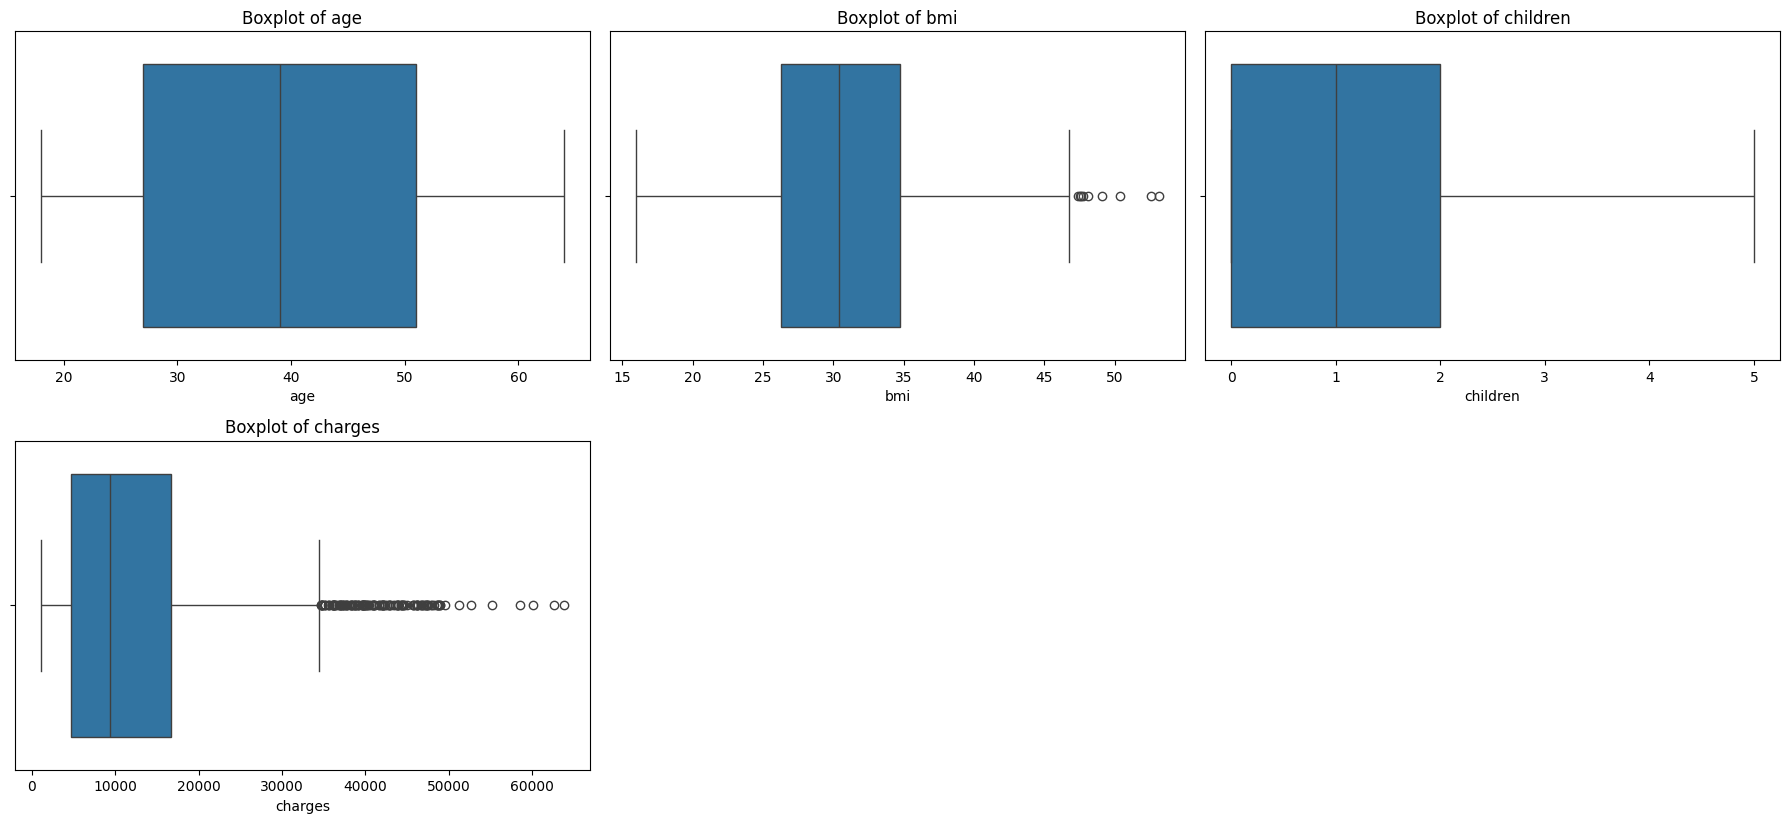

In [66]:
# menampilkan boxplot untuk setiap kolom numerik
numeric_columns = df.select_dtypes(include=["number"]).columns
categorical_columns = df.select_dtypes(include=["object"]).columns

plt.figure(figsize=(18, 12))
for i, column in enumerate(numeric_columns, 1):
    plt.subplot(3, 3, i)
    sns.boxplot(x=df[column])
    plt.title(f'Boxplot of {column}')
    plt.xlabel(column)
plt.tight_layout()
plt.show()


In [67]:
# Hitung Q1, Q3, dan IQR hanya untuk kolom numerikal
Q1 = df[numeric_columns].quantile(0.25)
Q3 = df[numeric_columns].quantile(0.75)
IQR = Q3 - Q1
# Buat filter untuk menghapus baris yang mengandung outlier di kolom numerikal
filter_outliers = ~((df[numeric_columns] < (Q1 - 1.5 * IQR)) |
                    (df[numeric_columns] > (Q3 + 1.5 * IQR))).any(axis=1)
# Terapkan filter ke dataset asli (termasuk kolom non-numerikal)
df = df[filter_outliers]
# Cek ukuran dataset setelah outlier dihapus
print(df.shape)
df.info()

(1193, 7)
<class 'pandas.core.frame.DataFrame'>
Index: 1193 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1193 non-null   int64  
 1   sex       1193 non-null   object 
 2   bmi       1193 non-null   float64
 3   children  1193 non-null   int64  
 4   smoker    1193 non-null   object 
 5   region    1193 non-null   object 
 6   charges   1193 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 74.6+ KB


terdapat data outliers pada features bmi dan charges sehingga dilakukan penanganan outliers menggunakna IRQ handler kemudian menghapus baris tersebut agar tidak outlier 

        jumlah sampel  persentase
sex                              
female            611        51.2
male              582        48.8


<Axes: title={'center': 'sex'}, xlabel='sex'>

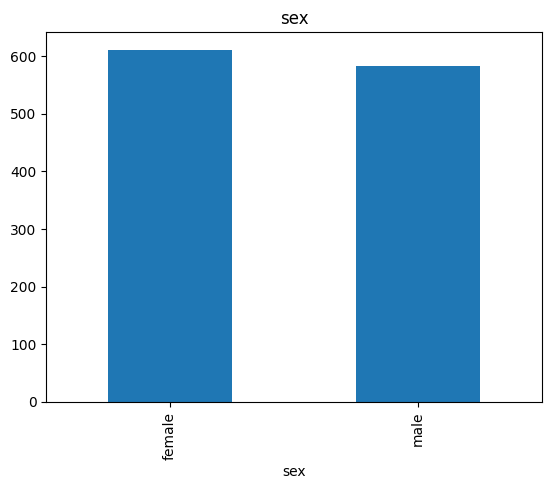

In [68]:
feature = categorical_columns[0]
count = df[feature].value_counts()
percent = 100*df[feature].value_counts(normalize=True)
data = pd.DataFrame({'jumlah sampel':count, 'persentase':percent.round(1)})
print(data)
count.plot(kind='bar', title=feature)

Mengetahui bahwa female dan male memiliki pembagian yang sama

        jumlah sampel  persentase
smoker                           
no               1055        88.4
yes               138        11.6


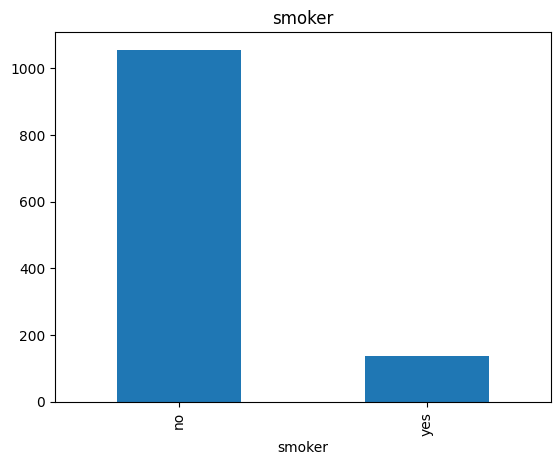

In [69]:
feature = categorical_columns[1]
count = df[feature].value_counts()
percent = 100*df[feature].value_counts(normalize=True)
data = pd.DataFrame({'jumlah sampel':count, 'persentase':percent.round(1)})
print(data)
count.plot(kind='bar', title=feature);

banyak yang tidak merokok mencapai presentase 88%

           jumlah sampel  persentase
region                              
northwest            305        25.6
southeast            302        25.3
northeast            295        24.7
southwest            291        24.4


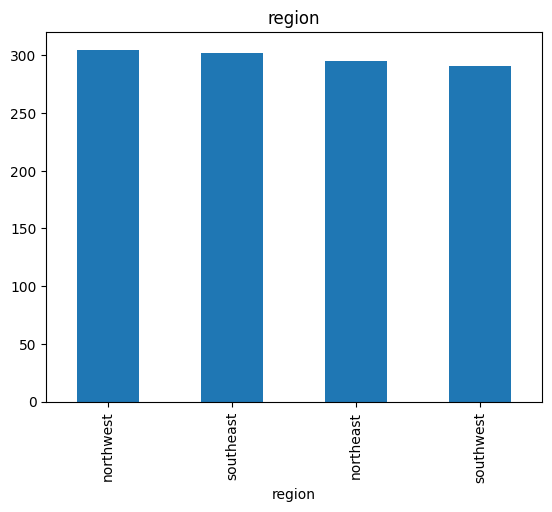

In [70]:
feature = categorical_columns[2]
count = df[feature].value_counts()
percent = 100*df[feature].value_counts(normalize=True)
data = pd.DataFrame({'jumlah sampel':count, 'persentase':percent.round(1)})
print(data)
count.plot(kind='bar', title=feature);

pembagian data merata pada setiap region yang memiliki pembagian 25%

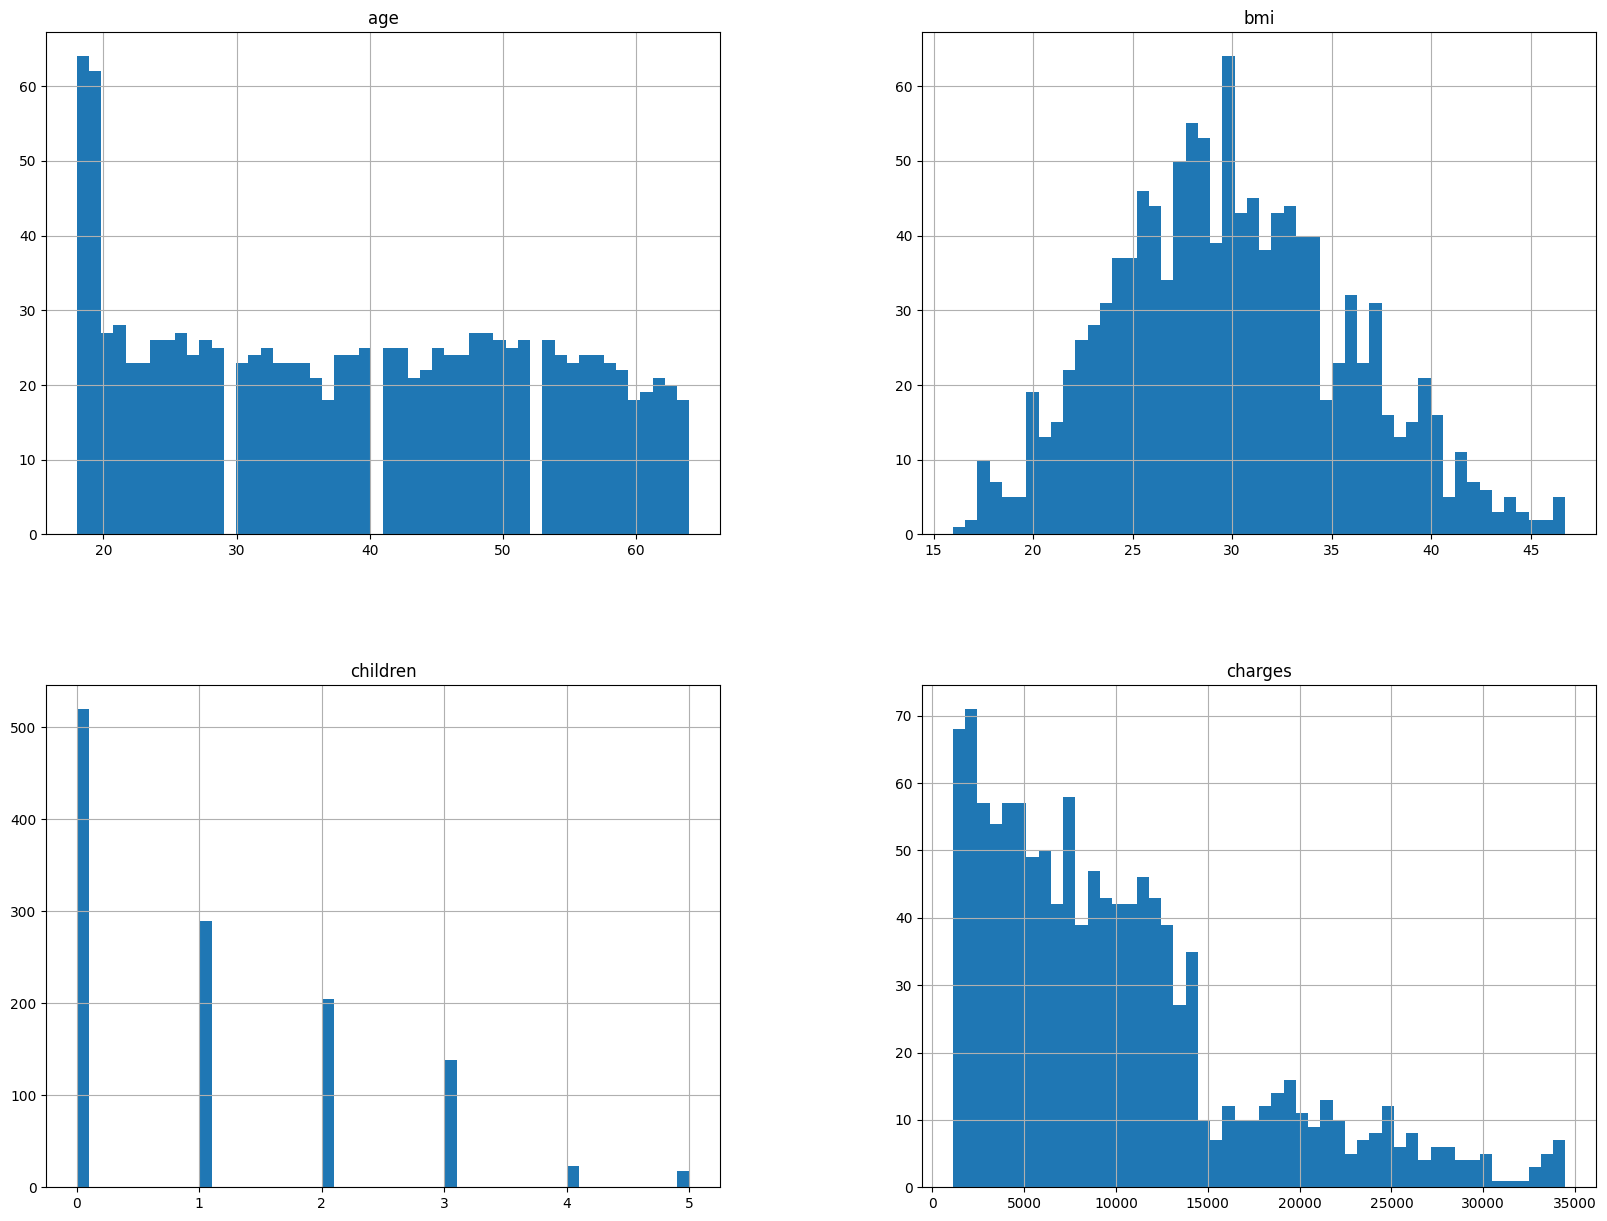

In [71]:
df.hist(bins=50, figsize=(20,15))
plt.show()

Dari histogram, kita bisa memperoleh beberapa informasi, antara lain:
- charges memiliki persebaran data lebih banya pada rentang dibawah 15000 dolar dan kemudian menurun
- umur memiliki persebaran lebih banyak pada angka awah 20 tahun
- bmi adalah body mass index yang memiliki satuan (kg/m^2) dan memiliki nilai ideal di 18.5 hingga 24.9 namun pada data ternyata persebaran lebih banyak di data setelah 25 kg/m^2
- kebanyakan member tidak memiliki anak / children = 0

C:\Users\asus-\AppData\Local\Temp\ipykernel_23572\2305422938.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.catplot(x=col, y="charges", kind="bar", dodge=False, height = 4, aspect = 3, data=df, palette="Set3")
C:\Users\asus-\AppData\Local\Temp\ipykernel_23572\2305422938.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.catplot(x=col, y="charges", kind="bar", dodge=False, height = 4, aspect = 3, data=df, palette="Set3")
C:\Users\asus-\AppData\Local\Temp\ipykernel_23572\2305422938.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.catplot(x=col, y="charges", 

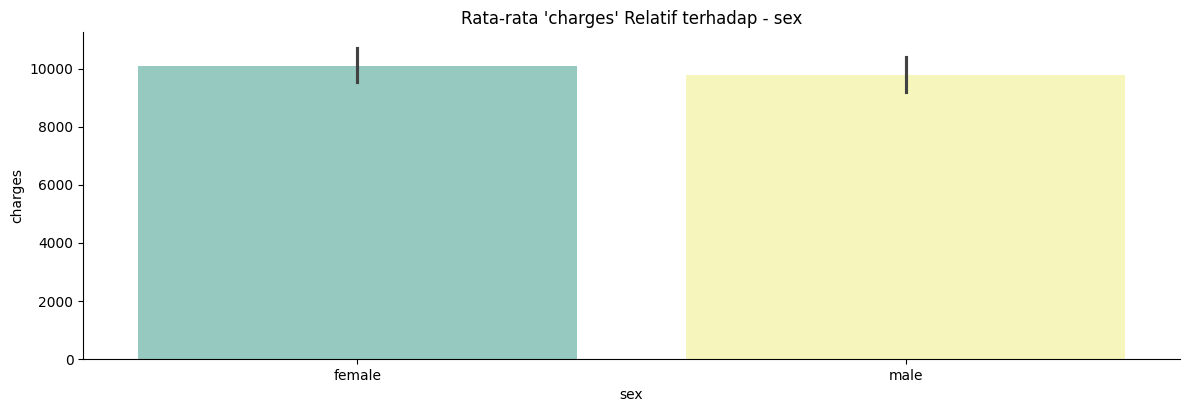

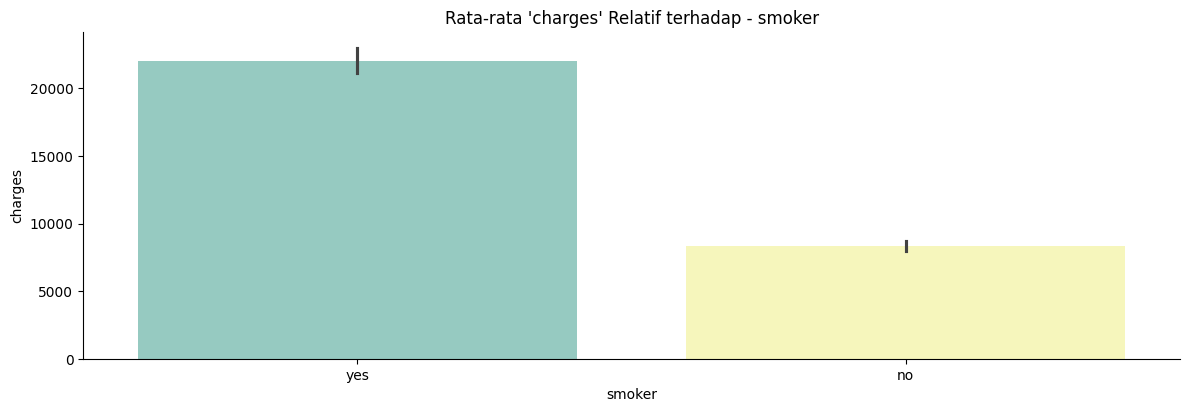

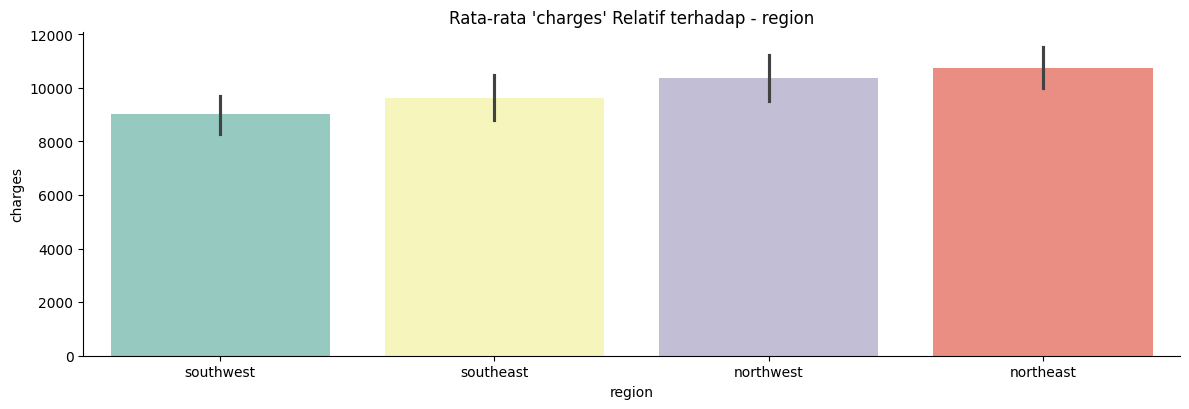

In [72]:
for col in categorical_columns:
  sns.catplot(x=col, y="charges", kind="bar", dodge=False, height = 4, aspect = 3, data=df, palette="Set3")
  plt.title("Rata-rata 'charges' Relatif terhadap - {}".format(col))

- rata-rata nilai charges terhadap sex memiliki perbandingan sama
- kebanyakan rata-rata nilai charges cenderung ke orang yang tidak merokok
- region relatif sama untuk keempat tempat, namun northeast memiliki nilai tinggi terhadap charges

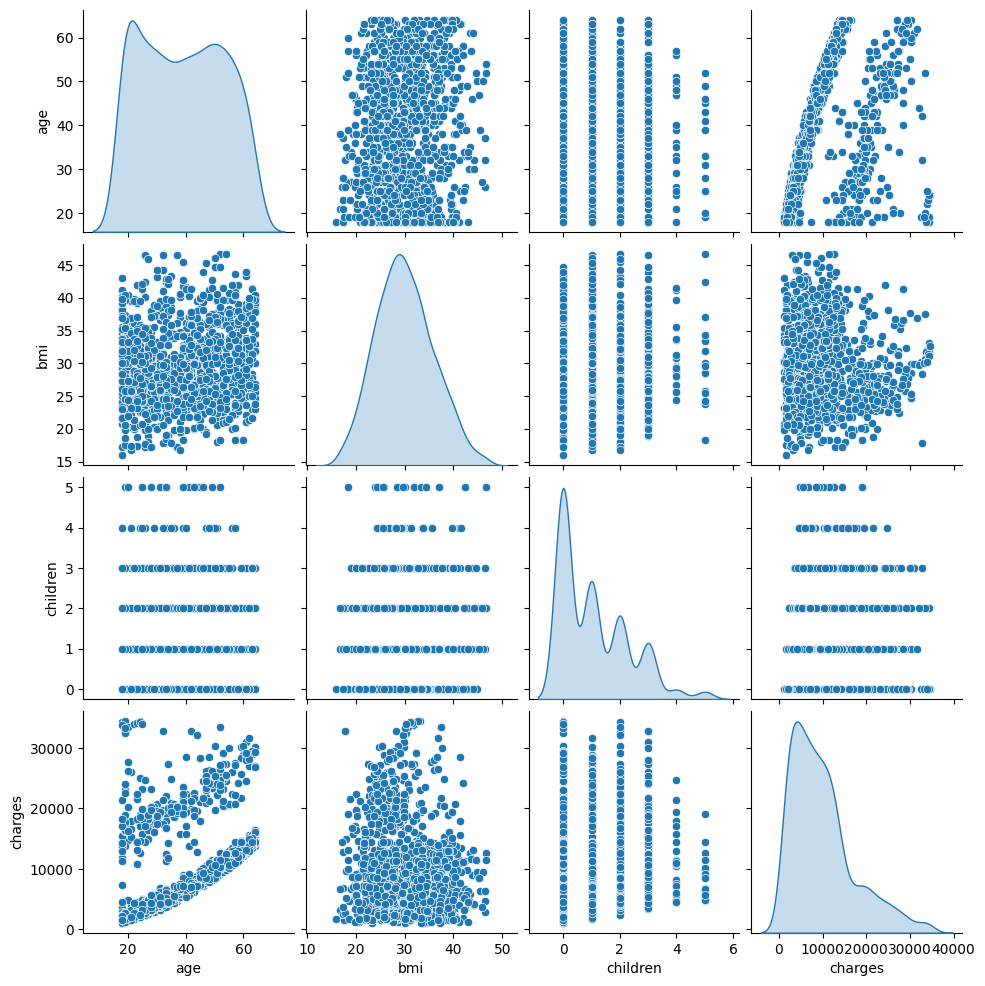

In [73]:
# Mengamati hubungan antar fitur numerik dengan fungsi pairplot()
sns.pairplot(df, diag_kind = 'kde')

kita lihat pada y = charges. terlihat age memiliki persebarang data yang linear dengan charges. untuk bmi, children memiliki persebaran sembarang terhadap charges

Text(0.5, 1.0, 'Correlation Matrix untuk Fitur Numerik ')

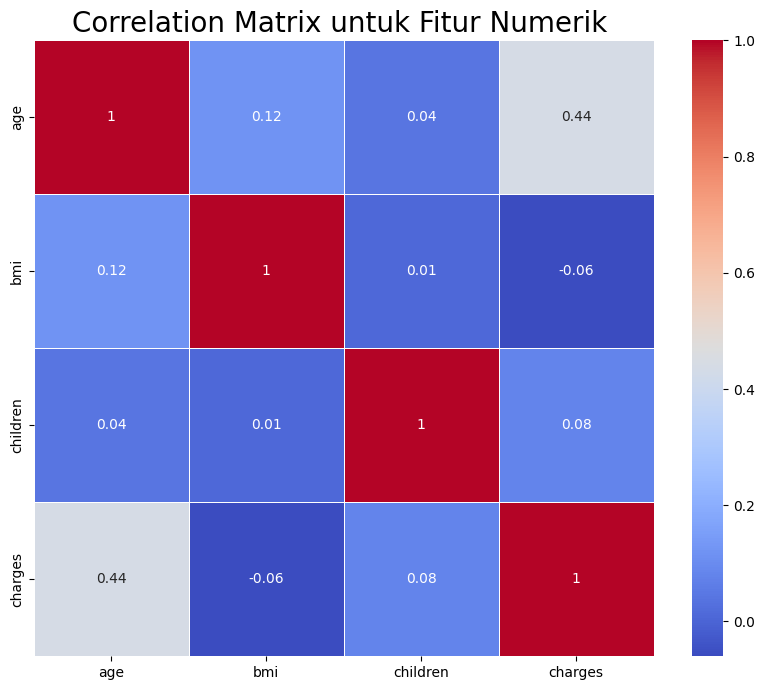

In [74]:
plt.figure(figsize=(10, 8))
correlation_matrix = df[numeric_columns].corr().round(2)
 
# Untuk menge-print nilai di dalam kotak, gunakan parameter anot=True
sns.heatmap(data=correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5, )
plt.title("Correlation Matrix untuk Fitur Numerik ", size=20)

age dan charges memiliki korelasi paling besar jika dibandingkan dengan feature lainnya

# Data Preparation

data preparation digunakan agar feature dapat diproses dengan baik oleh algoritma machine learning sehingga didapatkan model yang baik

## Encoding Feature Kategorikal dengan concat

In [75]:
df = pd.concat([df, pd.get_dummies(df['sex'], prefix='sex')],axis=1)
df = pd.concat([df, pd.get_dummies(df['smoker'], prefix='smoker')],axis=1)
df = pd.concat([df, pd.get_dummies(df['region'], prefix='region')],axis=1)
df.drop(['sex','smoker','region'], axis=1, inplace=True)
df.head()

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,True,False,False,True,False,False,False,True
1,18,33.770,1,1725.55230,False,True,True,False,False,False,True,False
2,28,33.000,3,4449.46200,False,True,True,False,False,False,True,False
3,33,22.705,0,21984.47061,False,True,True,False,False,True,False,False
4,32,28.880,0,3866.85520,False,True,True,False,False,True,False,False


merubah features categorical menjadi nominal agar dapat diproses oleh machine learning

## Train-Test-Split

In [76]:
X = df.drop(["charges"],axis =1)
y = df["charges"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1, random_state = 123)
print(f'Total # of sample in whole dataset: {len(X)}')
print(f'Total # of sample in train dataset: {len(X_train)}')
print(f'Total # of sample in test dataset: {len(X_test)}')

Total # of sample in whole dataset: 1193
Total # of sample in train dataset: 1073
Total # of sample in test dataset: 120


membagi data menjadi train dan test dengan perbandingan 90 : 10

## Standarisasi

In [77]:
numerical_features = ['age', 'bmi', 'children']
scaler = StandardScaler()
scaler.fit(X_train[numerical_features])
X_train[numerical_features] = scaler.transform(X_train.loc[:, numerical_features])
X_train[numerical_features].head()

,age,bmi,children
687,0.068833,1.979041,-0.894963
514,-0.002048,-0.288490,-0.079079
101,-0.639977,-0.769430,-0.894963
56,1.344691,0.308452,0.736804
1091,1.132048,-0.029392,-0.894963


merubah standarisasi dari feature numerical agar memiliki persebaran data yang rata sehingga memiliki nilai mean = 0 dan standard deviation = 1

In [78]:
X_train[numerical_features].describe().round(4)

,age,bmi,children
count,1073.0000,1073.0000,1073.0000
mean,0.0000,0.0000,-0.0000
std,1.0005,1.0005,1.0005
min,-1.4905,-2.3782,-0.8950
25%,-0.9235,-0.7212,-0.8950
50%,-0.0020,-0.0455,-0.0791
75%,0.8485,0.6463,0.7368
max,1.7700,2.8359,3.1845


# Model Development

In [79]:
# Siapkan dataframe untuk analisis model
models = pd.DataFrame(index=['train_mse', 'test_mse'], 
                      columns=['KNN', 'RandomForest', 'Boosting'])

## KNN

In [80]:
# training model KNN
knn = KNeighborsRegressor(n_neighbors=10)
knn.fit(X_train, y_train)
models.loc['train_mse','knn'] = mean_squared_error(y_pred = knn.predict(X_train), y_true=y_train)

## Random Forest

In [81]:
# training random forest
RF = RandomForestRegressor(n_estimators=50, max_depth=25, random_state=55, n_jobs=-1)
RF.fit(X_train, y_train)
models.loc['train_mse','RandomForest'] = mean_squared_error(y_pred=RF.predict(X_train), y_true=y_train)          

## Boosting Algorithm

In [82]:
# training boosting algorithm
boosting = AdaBoostRegressor(learning_rate=0.02, random_state=55)                             
boosting.fit(X_train, y_train)
models.loc['train_mse','Boosting'] = mean_squared_error(y_pred=boosting.predict(X_train), y_true=y_train)

# Evaluasi Model hasil training

In [83]:
# Lakukan scaling terhadap fitur numerik pada X_test sehingga memiliki rata-rata=0 dan varians=1
scaled = scaler.transform(X_test[numerical_features].astype(float))
X_test[numerical_features] = pd.DataFrame(scaled, columns=numerical_features, index=X_test.index)

In [84]:
# Buat variabel mse yang isinya adalah dataframe nilai mse data train dan test pada masing-masing algoritma
mse = pd.DataFrame(columns=['train', 'test'], index=['KNN','RF','Boosting'])
 
# Buat dictionary untuk setiap algoritma yang digunakan
model_dict = {'KNN': knn, 
              'RF' : RF, 
              'Boosting': boosting}
 
# Hitung Mean Squared Error masing-masing algoritma pada data train dan test
for name, model in model_dict.items():
    mse.loc[name, 'train'] = mean_squared_error(y_true=y_train, y_pred=model.predict(X_train))/1e3 
    mse.loc[name, 'test'] = mean_squared_error(y_true=y_test, y_pred=model.predict(X_test))/1e3
 
# Panggil mse
mse

,train,test
KNN,20554.109326,19339.262026
RF,3350.372485,15563.173322
Boosting,19147.534494,16455.820035


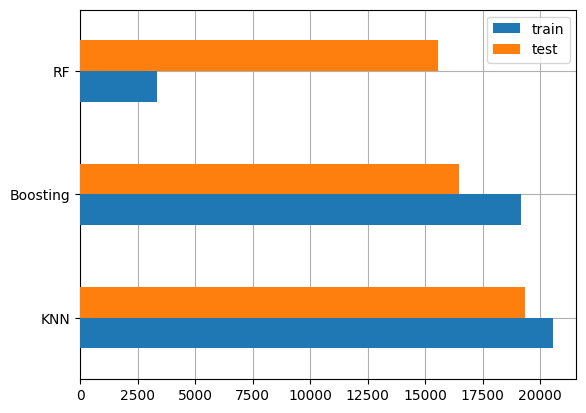

In [85]:
fig, ax = plt.subplots()
mse.sort_values(by='test', ascending=False).plot(kind='barh', ax=ax, zorder=3)
ax.grid(zorder=0)

In [86]:
prediksi = X_test.iloc[:1].copy()
pred_dict = {'y_true':y_test[:1]}
for name, model in model_dict.items():
    pred_dict['prediksi_'+name] = model.predict(prediksi).round(1)
 
pd.DataFrame(pred_dict)

,y_true,prediksi_KNN,prediksi_RF,prediksi_Boosting
274,2523.1695,2189.0,3774.9,5117.0


**RF** memberikan hasil yang paling mendekati. Untuk melakukan peningkatan performa, lakukanlah hal yang sama (pengaturan parameter) pada semua algoritma yang digunakan. Selain itu, Anda juga dapat melakukan optimasi parameter dengan menerapkan teknik Grid Search. 